In [15]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de estilo para gráficos
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")

# Ruta al archivo CSV
ruta_csv = "data/datos.csv"

# Verificar que el archivo existe antes de cargarlo
if os.path.exists(ruta_csv):
    # Carga de datos al DataFrame
    df = pd.read_csv(ruta_csv)

    # Información general del dataset
    print("Información general:")
    print(df.info())

    # Valores nulos por columna
    print("\nExistencia de valores nulos:")
    print(df.isnull().sum())

    # Vista previa de los primeros registros
    print("\nVista previa del dataset:")
    print(df.head())

else:
    print(f"El archivo no se encontró en la ruta: {ruta_csv}")


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_s

In [ ]:
# Txt con las primeras 10 descripciones de empleo
# Abrimos un archivo en modo escritura
with open("descripciones_empleo.txt", "w", encoding="utf-8") as f:
    for i, row in df.iloc[:10].iterrows():
        f.write(f"{i+1}. {row['Job Title']}\n")
        f.write(f"{row['Job Description']}\n")
        f.write("-" * 80 + "\n")  # separador


Python: 524
SQL: 743
Excel: 610
AWS: 258
Machine Learning: 828
Artificial Intelligence: 100
data analysis: 274
 R : 103
Spark: 241


C:\Users\Michael\AppData\Local\Temp\ipykernel_23084\1383577726.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, x='Tecnología', y='Frecuencia', palette='mako')


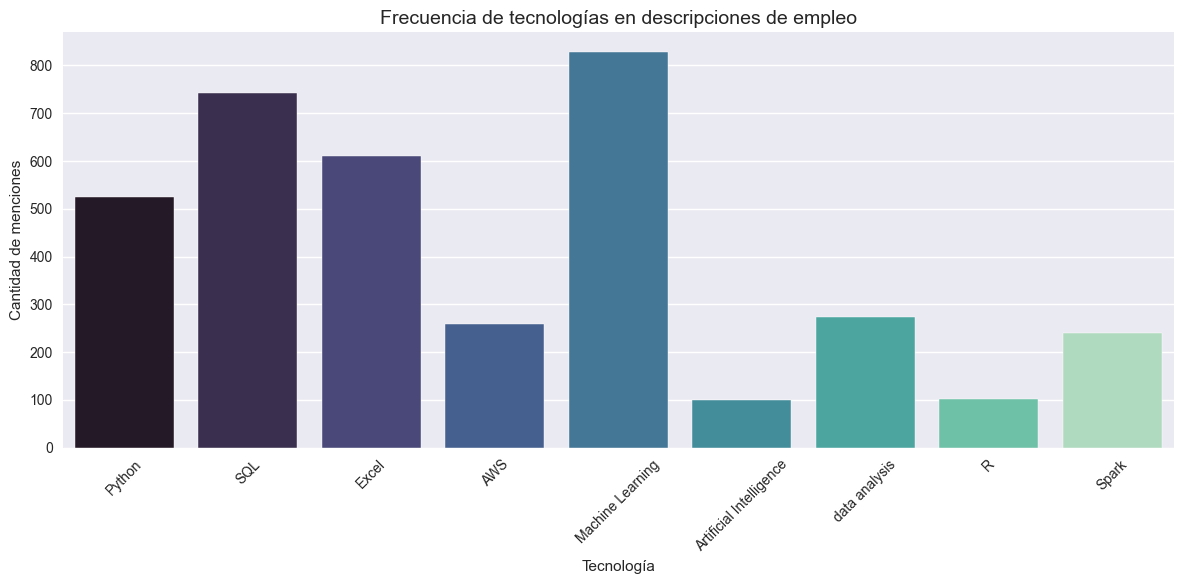

In [7]:
# Frecuencia de tecnologias en las descripciones de empleo
# Convertimos todo el texto a uno solo 
texto_completo = " ".join(df['Job Description'].dropna())

# Lista simple de palabras clave
keywords = ['Python', 'SQL', 'Excel', 'AWS', 'Machine Learning', 'Artificial Intelligence', 'data analysis', ' R ', 'Spark']

# Contamos cuantas veces aparece cada keyword
keyword_counts = {}
for palabra in keywords:
    cantidad = texto_completo.lower().count(palabra.lower())
    keyword_counts[palabra.strip()] = cantidad  # quitamos espacios si los hay
    print(f"{palabra}: {cantidad}")

# Visualización: gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns
#Creacion de carpeta
import os
os.makedirs("visualizaciones", exist_ok=True)

# Convertimos el diccionario a DataFrame
keywords_df = pd.DataFrame(list(keyword_counts.items()), columns=['Tecnología', 'Frecuencia'])

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=keywords_df, x='Tecnología', y='Frecuencia', palette='mako')
plt.title("Frecuencia de tecnologías en descripciones de empleo", fontsize=14)
plt.ylabel("Cantidad de menciones")
plt.xlabel("Tecnología")
plt.xticks(rotation=45)
plt.tight_layout()
#Guardamos la visualizacion y mostramos
plt.savefig("visualizaciones/tecnologias_frecuencia.png", dpi=300)
plt.show()


Salario promedio con PYTHON: $112.65
Salario promedio con R: $70.75
Salario promedio con SPARK: $113.35
Salario promedio con AWS: $112.56
Salario promedio con EXCEL: $98.50

La tecnología mejor pagada es: SPARK
Con un salario promedio de: $113.35


,Tecnología,Salario Promedio
0,SPARK,113.347305
1,PYTHON,112.653061
2,AWS,112.559659
3,EXCEL,98.502577
4,R,70.750000


C:\Users\Michael\AppData\Local\Temp\ipykernel_23084\2484013456.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tech_df, x='Tecnología', y='Salario Promedio', palette='viridis')


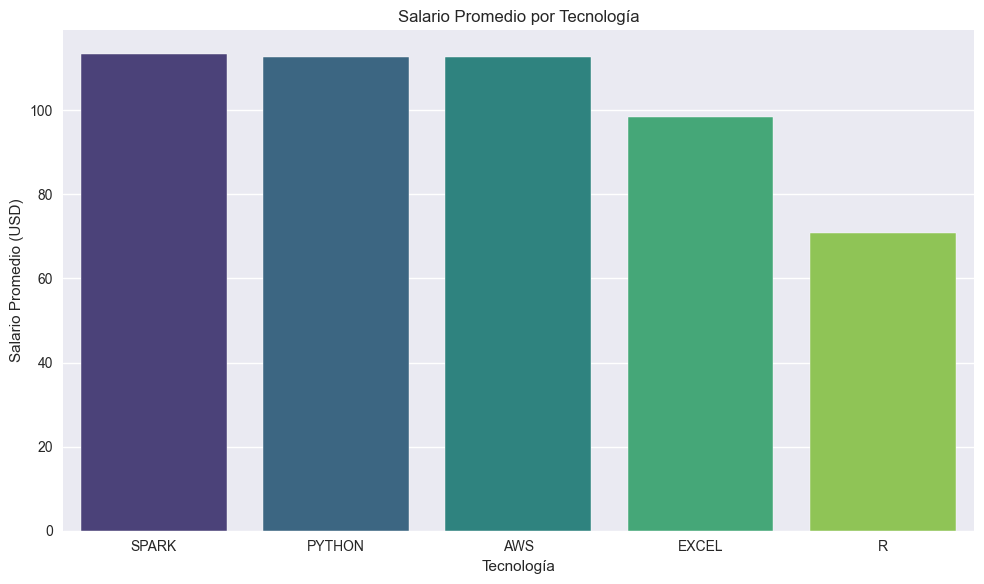

In [ ]:
# Tecnologia mejor pagada
# Copia del DataFrame original
df_tech = df.copy()

# Lista con tecnologías requeridas
tech_skills = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']

# Diccionario para guardar resultados
salary_by_skill = {}

# Calcular promedio para cada tecnología
for skill in tech_skills:
    avg_salary = df_tech[df_tech[skill] == 1]['avg_salary'].mean()
    salary_by_skill[skill.replace('_yn', '').upper()] = avg_salary
    print(f"Salario promedio con {skill.replace('_yn', '').upper()}: ${avg_salary:.2f}")

# Encontrar la tecnología con mayor salario promedio
best_skill = max(salary_by_skill, key=salary_by_skill.get)
best_salary = salary_by_skill[best_skill]

# Mostrar la ganadora 🏆
print("\nLa tecnología mejor pagada es:", best_skill)
print(f"Con un salario promedio de: ${best_salary:.2f}")

# Convertimos el diccionario a DataFrame
tech_df = pd.DataFrame(list(salary_by_skill.items()), columns=['Tecnología', 'Salario Promedio'])

# Ordenamos de mayor a menor salario
tech_df = tech_df.sort_values(by='Salario Promedio', ascending=False).reset_index(drop=True)

# Mostramos la tabla como output visual
display(tech_df)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=tech_df, x='Tecnología', y='Salario Promedio', palette='viridis')
plt.title('Salario Promedio por Tecnología')
plt.ylabel('Salario Promedio (USD)')
plt.xlabel('Tecnología')
plt.tight_layout()
# Guardar grafico
plt.savefig("visualizaciones/salario_por_tecnologia.png", dpi=300)

# Mostrar gráfico
plt.show()
